In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as imread

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# Keras
from tensorflow.keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
# tensorflow Biblioteke
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [2]:
url = r'C:\Users\PC_Seraphin\ML_projects\NLP Projects\Seg_Dataset'

In [3]:
intel_image = list(os.listdir(url))
intel_image.remove('seg_pred')
intel_image

['seg_test', 'seg_train']

In [4]:
test_directory = os.path.join(url,os.path.join(intel_image[0],intel_image[0]))

In [5]:
test_image_type = os.listdir(test_directory)
test_image_type

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [6]:
train_directory = os.path.join(url,os.path.join(intel_image[1],intel_image[1]))

In [7]:
train_image_type = os.listdir(train_directory)
train_image_type

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [8]:
num_image_test = [len(os.listdir(os.path.join(test_directory ,image))) for image in test_image_type]
num_image_test

[437, 474, 553, 525, 510, 501]

In [9]:
num_image_train = [len(os.listdir(os.path.join(train_directory ,image))) for image in train_image_type]
num_image_train

[2191, 2271, 2404, 2512, 2274, 2382]

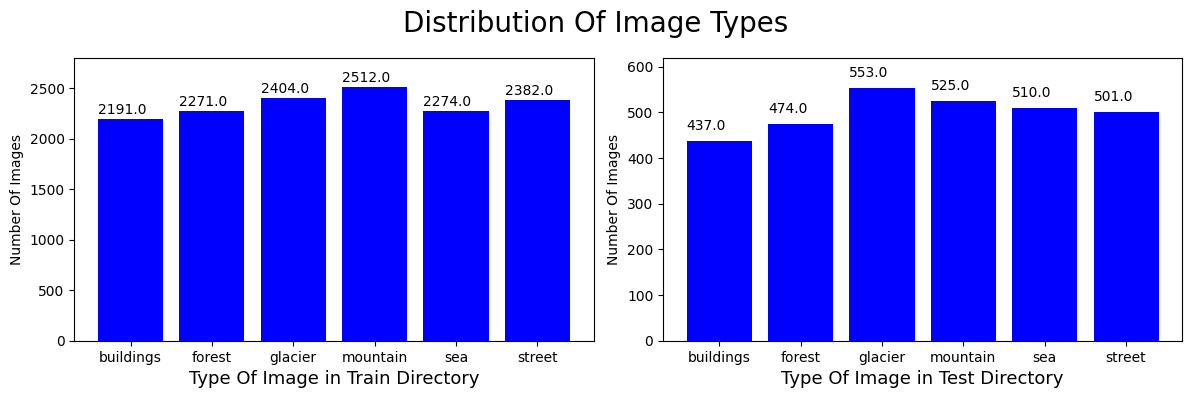

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

plt.suptitle("Distribution Of Image Types", fontsize=20, color='black')

ax1.bar(train_image_type ,num_image_train, color='blue')
ax1.set_xlabel("Type Of Image in Train Directory",fontsize=13)
ax1.set_ylabel("Number Of Images")
ax1.set_ylim([0,2800])
for p in ax1.patches:
    ax1.annotate("{:.1f}".format(p.get_height()) ,(p.get_x() ,p.get_height()+ 50))

ax2.bar(test_image_type ,num_image_test, color='blue')
ax2.set_xlabel("Type Of Image in Test Directory",fontsize=13)
ax2.set_ylabel("Number Of Images")
ax2.set_ylim([0,620])
for p in ax2.patches:
    ax2.annotate("{:.1f}".format(p.get_height()) ,(p.get_x() ,p.get_height() + 25))
    
fig.tight_layout(pad=1,w_pad=1)
plt.show()

In [11]:
BATCH_SIZE = 64
IMAGE_SIZE = (150, 150, 3)

In [12]:
image_gen = ImageDataGenerator( 
                               width_shift_range=0.10,
                               height_shift_range=0.10, 
                               rescale=1./255,
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True,
                               validation_split=0.15)                            

In [15]:
test_directory

'C:\\Users\\PC_Seraphin\\ML_projects\\NLP Projects\\Seg_Dataset\\seg_test\\seg_test'

In [16]:
test_image_gen = image_gen.flow_from_directory(test_directory,
                                               target_size=IMAGE_SIZE[:2],
                                               color_mode='rgb',
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical'
                                               ,shuffle=False)

Found 3000 images belonging to 6 classes.


In [17]:
test_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [18]:
train_image_gen = image_gen.flow_from_directory(train_directory,
                                               target_size=IMAGE_SIZE[:2],
                                               color_mode='rgb',
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical'
                                               ,shuffle=True)

Found 14034 images belonging to 6 classes.


In [21]:
train_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [24]:
early_stop = EarlyStopping(patience=4)

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=IMAGE_SIZE, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=IMAGE_SIZE, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=IMAGE_SIZE, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [27]:
results = model.fit(train_image_gen, validation_data=test_image_gen, callbacks=[early_stop], epochs=20, batch_size=BATCH_SIZE)

Epoch 1/20
220/220 [==============================] - 418s 2s/step - loss: 1.0434 - accuracy: 0.5936 - val_loss: 0.8317 - val_accuracy: 0.6813
Epoch 2/20
220/220 [==============================] - 295s 1s/step - loss: 0.7653 - accuracy: 0.7158 - val_loss: 0.6878 - val_accuracy: 0.7427
Epoch 3/20
220/220 [==============================] - 294s 1s/step - loss: 0.6381 - accuracy: 0.7698 - val_loss: 0.6313 - val_accuracy: 0.7597
Epoch 4/20
220/220 [==============================] - 307s 1s/step - loss: 0.5667 - accuracy: 0.7936 - val_loss: 0.5467 - val_accuracy: 0.8107
Epoch 5/20
220/220 [==============================] - 283s 1s/step - loss: 0.5195 - accuracy: 0.8104 - val_loss: 0.4999 - val_accuracy: 0.8293
Epoch 6/20
220/220 [==============================] - 273s 1s/step - loss: 0.4867 - accuracy: 0.8202 - val_loss: 0.4558 - val_accuracy: 0.8397
Epoch 7/20
220/220 [==============================] - 277s 1s/step - loss: 0.4686 - accuracy: 0.8313 - val_loss: 0.4454 - val_accuracy: 0.8447

In [29]:
metrics = pd.DataFrame(results.history)

In [30]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.043366,0.593630,0.831735,0.681333
1,0.765276,0.715762,0.687754,0.742667
2,0.638090,0.769773,0.631291,0.759667
3,0.566735,0.793644,0.546687,0.810667
4,0.519455,0.810389,0.499908,0.829333
5,0.486735,0.820222,0.455763,0.839667
6,0.468627,0.831267,0.445449,0.844667
7,0.425868,0.848867,0.439955,0.846000
8,0.422875,0.846943,0.435893,0.839667
9,0.390021,0.861693,0.408216,0.857000


In [31]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot: xlabel='Number of Epochs'>

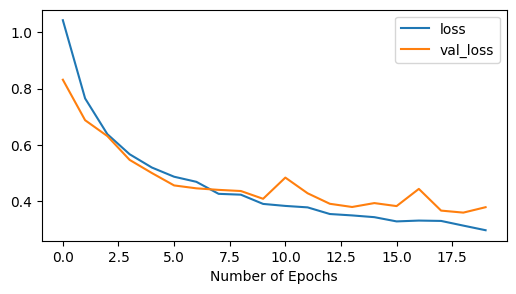

In [36]:
metrics[['loss','val_loss']].plot(figsize=(6,3), xlabel="Number of Epochs")

<AxesSubplot: xlabel='Number of Epochs'>

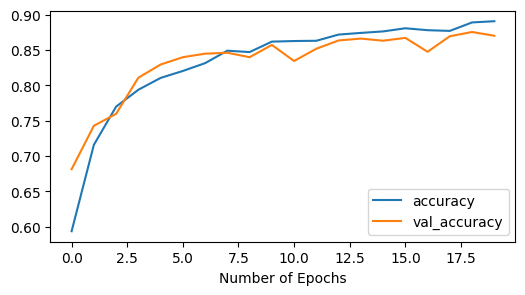

In [35]:
metrics[['accuracy', 'val_accuracy']].plot(figsize=(6,3), xlabel="Number of Epochs")

In [37]:
pred_probabilities = model.predict(test_image_gen)

47/47 [==============================] - 38s 806ms/step


In [45]:
predictions = np.argmax(pred_probabilities,axis=1)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [46]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       437
           1       0.94      0.97      0.96       474
           2       0.85      0.82      0.84       553
           3       0.89      0.76      0.82       525
           4       0.80      0.94      0.87       510
           5       0.94      0.80      0.86       501

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.86      3000



In [43]:
test_image_gen.classes

array([0, 0, 0, ..., 5, 5, 5])

In [47]:
confusion_matrix(test_image_gen.classes, predictions)

array([[405,   3,   2,   2,   7,  18],
       [  4, 461,   4,   2,   1,   2],
       [  4,   5, 453,  43,  45,   3],
       [  0,   5,  62, 399,  59,   0],
       [ 13,   4,   9,   2, 480,   2],
       [ 84,  10,   1,   0,   7, 399]], dtype=int64)

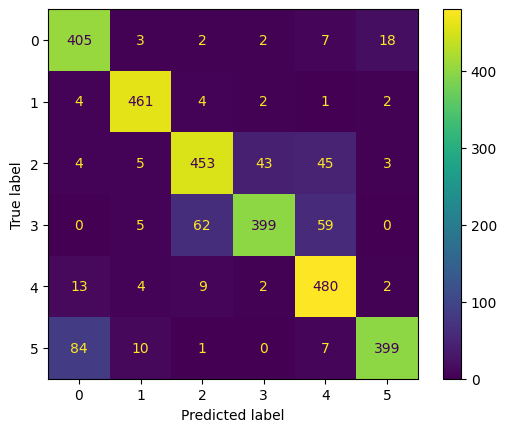

In [48]:
ConfusionMatrixDisplay.from_predictions(test_image_gen.classes, predictions)

In [49]:
from tensorflow.keras.models import load_model
model.save('Intel_image_classification.h5')